In [1]:
# install.packages("caret")
# install.packages("ROSE")
# install.packages("randomForest")
# install.packages("xgboost")
# install.packages("caTools")

In [1]:
library(dplyr)       
library(caret)
library(ROSE)
library(randomForest)
library(xgboost)
library(caTools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

Loaded ROSE 0.0-4


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [2]:
# Load the Dataset

df <- read.csv('star_classification.csv')
df

obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>
1.237661e+18,135.689107,32.4946318,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,6.347936e-01,5812,56354,171
1.237665e+18,144.826101,31.2741849,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,7.791360e-01,10445,58158,427
1.237661e+18,142.188790,35.5824442,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,6.441945e-01,4576,55592,299
1.237663e+18,338.741038,-0.4028276,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,9.323456e-01,9149,58039,775
1.237680e+18,345.282593,21.1838656,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,1.161227e-01,6121,56187,842
1.237680e+18,340.995121,20.5894763,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659e+00,5026,55855,741
1.237679e+18,23.234926,11.4181876,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,5.864546e-01,11069,58456,113
1.237679e+18,5.433176,12.0651860,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,4.770090e-01,6183,56210,15
1.237661e+18,200.290475,47.1994023,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,6.600120e-01,6625,56386,719


In [3]:
names(df)

[1] "obj_ID"      "alpha"       "delta"       "u"           "g"          
 [6] "r"           "i"           "z"           "run_ID"      "rerun_ID"   
[11] "cam_col"     "field_ID"    "spec_obj_ID" "class"       "redshift"   
[16] "plate"       "MJD"         "fiber_ID"

In [4]:
summary(df)

     obj_ID              alpha              delta               u           
 Min.   :1.238e+18   Min.   :  0.0055   Min.   :-18.785   Min.   :-9999.00  
 1st Qu.:1.238e+18   1st Qu.:127.5182   1st Qu.:  5.147   1st Qu.:   20.35  
 Median :1.238e+18   Median :180.9007   Median : 23.646   Median :   22.18  
 Mean   :1.238e+18   Mean   :177.6291   Mean   : 24.135   Mean   :   21.98  
 3rd Qu.:1.238e+18   3rd Qu.:233.8950   3rd Qu.: 39.902   3rd Qu.:   23.69  
 Max.   :1.238e+18   Max.   :359.9998   Max.   : 83.001   Max.   :   32.78  
       g                  r                i               z           
 Min.   :-9999.00   Min.   : 9.822   Min.   : 9.47   Min.   :-9999.00  
 1st Qu.:   18.96   1st Qu.:18.136   1st Qu.:17.73   1st Qu.:   17.46  
 Median :   21.10   Median :20.125   Median :19.41   Median :   19.00  
 Mean   :   20.53   Mean   :19.646   Mean   :19.08   Mean   :   18.67  
 3rd Qu.:   22.12   3rd Qu.:21.045   3rd Qu.:20.40   3rd Qu.:   19.92  
 Max.   :   31.60   Max.   :2

In [5]:
str(df)

'data.frame':	100000 obs. of  18 variables:
 $ obj_ID     : num  1.24e+18 1.24e+18 1.24e+18 1.24e+18 1.24e+18 ...
 $ alpha      : num  136 145 142 339 345 ...
 $ delta      : num  32.495 31.274 35.582 -0.403 21.184 ...
 $ u          : num  23.9 24.8 25.3 22.1 19.4 ...
 $ g          : num  22.3 22.8 22.7 23.8 17.6 ...
 $ r          : num  20.4 22.6 20.6 21.6 16.5 ...
 $ i          : num  19.2 21.2 19.3 20.5 16 ...
 $ z          : num  18.8 21.6 18.9 19.3 15.5 ...
 $ run_ID     : int  3606 4518 3606 4192 8102 8102 7773 7773 3716 5934 ...
 $ rerun_ID   : int  301 301 301 301 301 301 301 301 301 301 ...
 $ cam_col    : int  2 5 2 3 3 3 2 2 5 4 ...
 $ field_ID   : int  79 119 120 214 137 110 462 346 108 122 ...
 $ spec_obj_ID: num  6.54e+18 1.18e+19 5.15e+18 1.03e+19 6.89e+18 ...
 $ class      : chr  "GALAXY" "GALAXY" "GALAXY" "GALAXY" ...
 $ redshift   : num  0.635 0.779 0.644 0.932 0.116 ...
 $ plate      : int  5812 10445 4576 9149 6121 5026 11069 6183 6625 2444 ...
 $ MJD        : int  

In [6]:
dim(df)

[1] 100000     18

In [7]:
rows_of_df <- nrow(df)
rows_of_df

[1] 100000

In [8]:
cols_of_df <- ncol(df)
cols_of_df

[1] 18

In [9]:
## 17 independent and 1 dependent variable

In [10]:
# Convert character columns to factor
df <- df %>%
  mutate_if(is.character, as.factor)

#### Remove irrelevant variables:

In [11]:
df <- df[, sapply(df, function(x) {
  if (is.factor(x)) {
    return(TRUE)  # Exclude factor variables
  } else {
    return(var(x) > 0)  # Calculate variance for non-factor variables
  }
})]

In [12]:
d<-dim(df)

In [13]:
# Print the number and proportion of irrelevant predictive/independent variables removed
rmvd <- cols_of_df - d[2]
prop <- rmvd / cols_of_df
print(paste("Number of Irrelevant Variables Removed:", rmvd))
print(paste("Proportion of Irrelevant Variables Removed:", prop))

[1] "Number of Irrelevant Variables Removed: 1"
[1] "Proportion of Irrelevant Variables Removed: 0.0555555555555556"


In [14]:
# Print the number and proportion of irrelevant predictive/independent variables removed
rmvd <- cols_of_df - d[2]
prop <- rmvd / cols_of_df
print(paste("Number of Irrelevant Variables Removed:", rmvd))
print(paste("Proportion of Irrelevant Variables Removed:", prop))

[1] "Number of Irrelevant Variables Removed: 1"
[1] "Proportion of Irrelevant Variables Removed: 0.0555555555555556"


In [15]:
summary(df)

     obj_ID              alpha              delta               u           
 Min.   :1.238e+18   Min.   :  0.0055   Min.   :-18.785   Min.   :-9999.00  
 1st Qu.:1.238e+18   1st Qu.:127.5182   1st Qu.:  5.147   1st Qu.:   20.35  
 Median :1.238e+18   Median :180.9007   Median : 23.646   Median :   22.18  
 Mean   :1.238e+18   Mean   :177.6291   Mean   : 24.135   Mean   :   21.98  
 3rd Qu.:1.238e+18   3rd Qu.:233.8950   3rd Qu.: 39.902   3rd Qu.:   23.69  
 Max.   :1.238e+18   Max.   :359.9998   Max.   : 83.001   Max.   :   32.78  
       g                  r                i               z           
 Min.   :-9999.00   Min.   : 9.822   Min.   : 9.47   Min.   :-9999.00  
 1st Qu.:   18.96   1st Qu.:18.136   1st Qu.:17.73   1st Qu.:   17.46  
 Median :   21.10   Median :20.125   Median :19.41   Median :   19.00  
 Mean   :   20.53   Mean   :19.646   Mean   :19.08   Mean   :   18.67  
 3rd Qu.:   22.12   3rd Qu.:21.045   3rd Qu.:20.40   3rd Qu.:   19.92  
 Max.   :   31.60   Max.   :2

In [16]:
str(df)

'data.frame':	100000 obs. of  17 variables:
 $ obj_ID     : num  1.24e+18 1.24e+18 1.24e+18 1.24e+18 1.24e+18 ...
 $ alpha      : num  136 145 142 339 345 ...
 $ delta      : num  32.495 31.274 35.582 -0.403 21.184 ...
 $ u          : num  23.9 24.8 25.3 22.1 19.4 ...
 $ g          : num  22.3 22.8 22.7 23.8 17.6 ...
 $ r          : num  20.4 22.6 20.6 21.6 16.5 ...
 $ i          : num  19.2 21.2 19.3 20.5 16 ...
 $ z          : num  18.8 21.6 18.9 19.3 15.5 ...
 $ run_ID     : int  3606 4518 3606 4192 8102 8102 7773 7773 3716 5934 ...
 $ cam_col    : int  2 5 2 3 3 3 2 2 5 4 ...
 $ field_ID   : int  79 119 120 214 137 110 462 346 108 122 ...
 $ spec_obj_ID: num  6.54e+18 1.18e+19 5.15e+18 1.03e+19 6.89e+18 ...
 $ class      : Factor w/ 3 levels "GALAXY","QSO",..: 1 1 1 1 1 2 2 1 1 3 ...
 $ redshift   : num  0.635 0.779 0.644 0.932 0.116 ...
 $ plate      : int  5812 10445 4576 9149 6121 5026 11069 6183 6625 2444 ...
 $ MJD        : int  56354 58158 55592 58039 56187 55855 58456 56210 

#### Identify and remove out outliers:

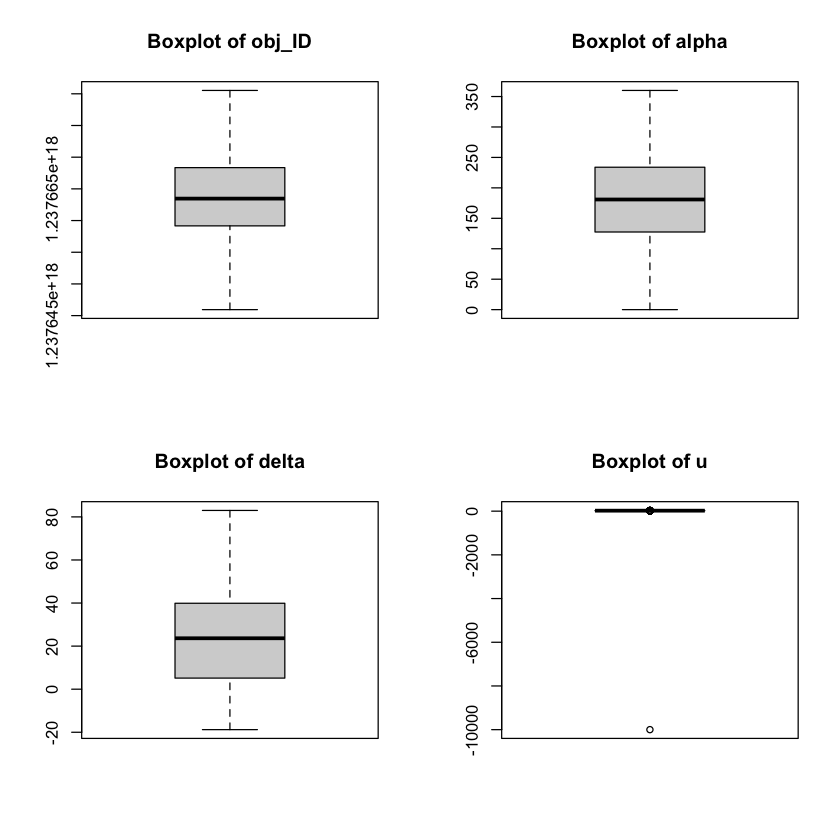

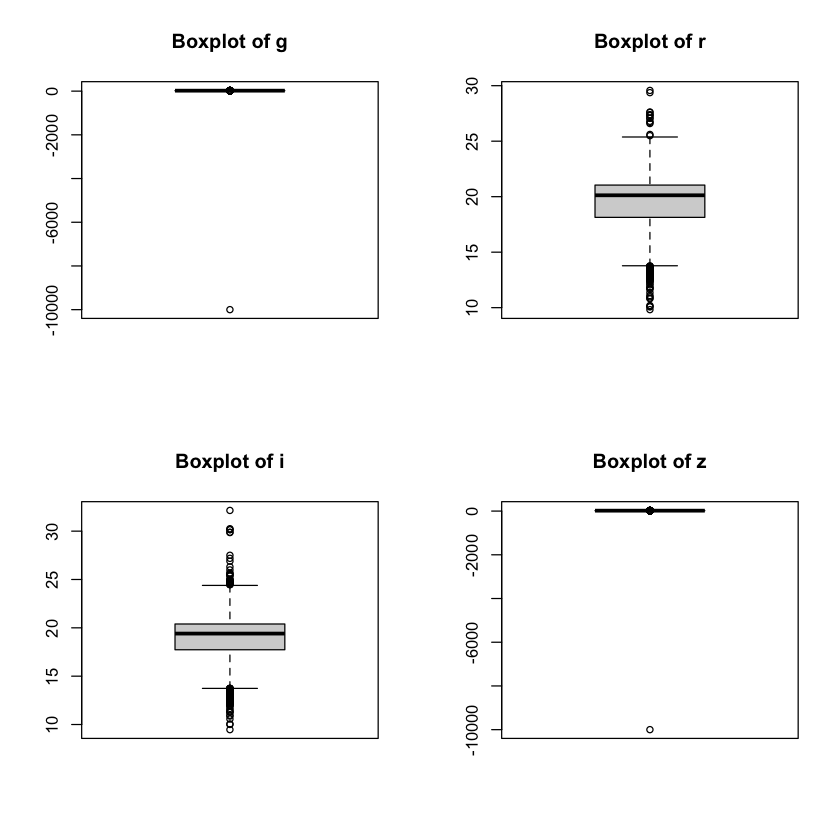

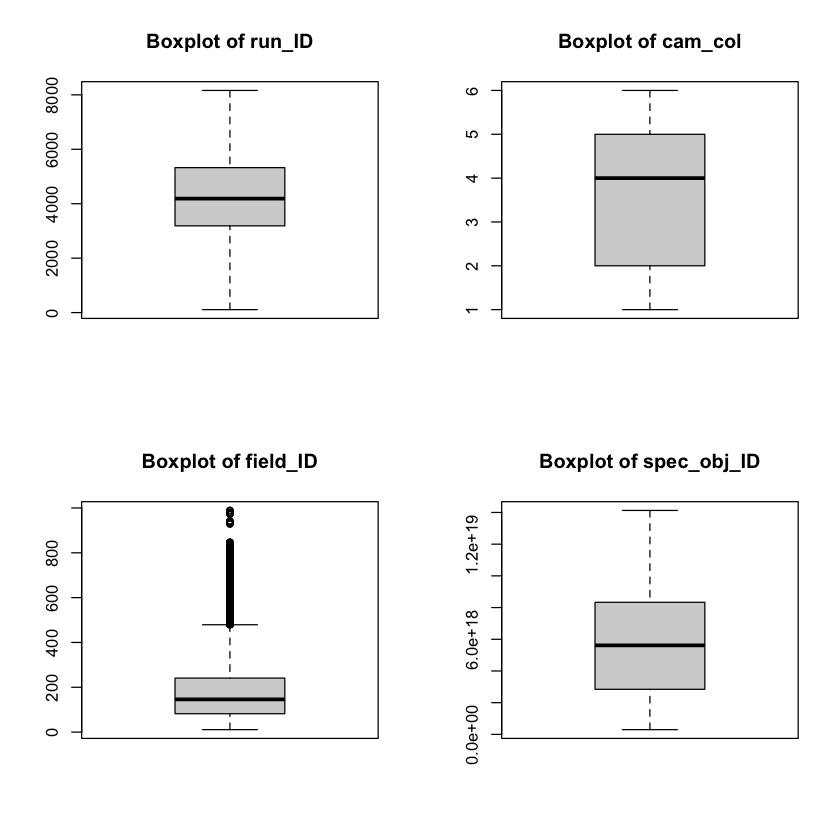

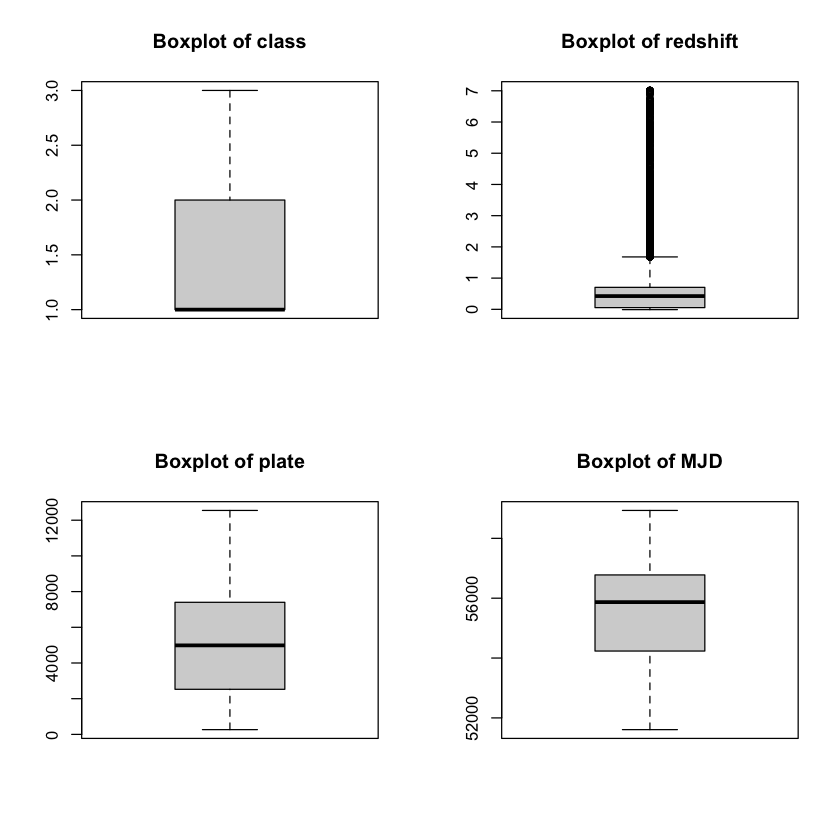

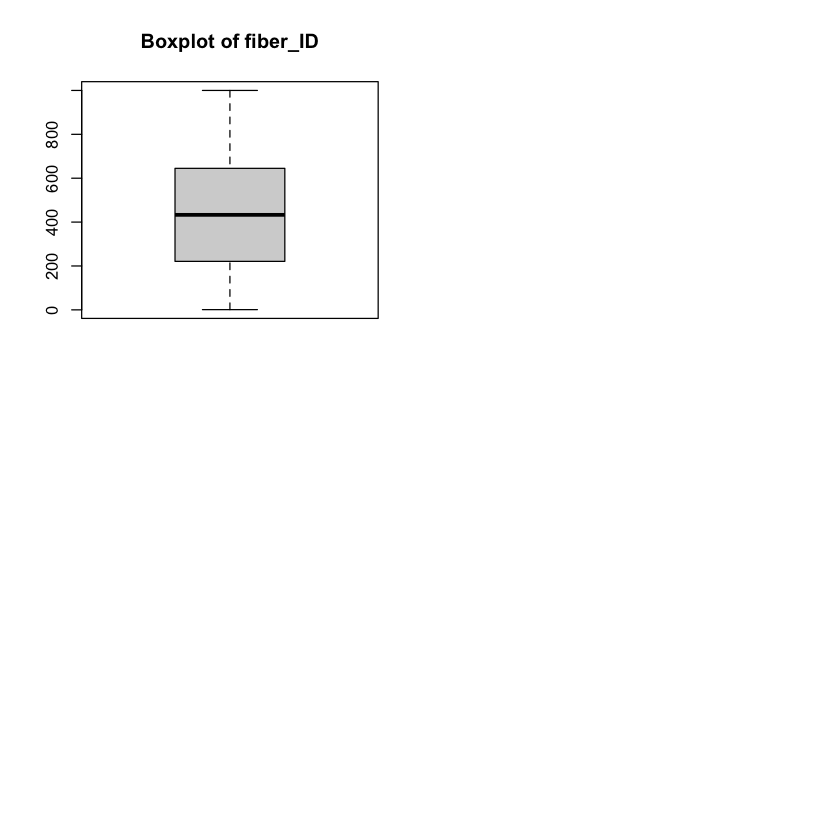

In [17]:
par(mfrow=c(2,2))

columns_to_plot <- c('obj_ID','alpha','delta','u','g','r','i','z','run_ID','cam_col','field_ID','spec_obj_ID','class','redshift','plate','MJD','fiber_ID')

for (col in columns_to_plot) {
  boxplot(df[[col]], main = paste("Boxplot of", col))
}

In [18]:
IQR <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower_threshold <- Q1 - 1.5 * IQR
  upper_threshold <- Q3 + 1.5 * IQR
  outliers <- x < lower_threshold | x > upper_threshold
  return(outliers)
}

In [19]:
# assign numerical variables to nuim_vars
num_vars <- sapply(df, is.numeric)

# identify outliers i the dataframe
outlier <- sapply(df[, num_vars], IQR)

# sum of outliers
total <- sum(rowSums(outlier))
total

[1] 15186

In [20]:
new_df <- as.data.frame(lapply(df[, num_vars], IQR))

In [21]:
# Count the number of outliers filtered
fltrd <- sum(new_df != df[, num_vars])

In [22]:
# Calculate the proportion of outliers filtered
prop <- fltrd / (nrow(df) * length(num_vars))

In [23]:
# Output the results
cat("Number of outliers filtered:", total, "\n")
cat("Proportion of outliers filtered:", prop, "\n")

Number of outliers filtered: 15186 
Proportion of outliers filtered: 0.9409341 


In [24]:
# assign numerical variables to nuim_vars
num_vars <- sapply(df, is.numeric)

# identify outliers i the dataframe
outlier <- sapply(df[, num_vars], IQR)

# sum of outliers
total <- sum(rowSums(outlier))
total

[1] 15186

In [25]:
new_df <- as.data.frame(lapply(df[, num_vars], IQR))

In [26]:
# Count the number of outliers filtered
fltrd <- sum(new_df != df[, num_vars])

In [27]:
# Calculate the proportion of outliers filtered
prop <- fltrd / (nrow(df) * length(num_vars)) 

In [28]:
# Output the results
cat("Number of outliers filtered:", total, "\n")
cat("Proportion of outliers filtered:", prop, "\n")

Number of outliers filtered: 15186 
Proportion of outliers filtered: 0.9409341 


#### Romove duplicates

In [29]:
dimention <- dim(new_df)

In [30]:
new_df <- unique(df)

In [31]:
dimention_after <- dim(new_df)

In [32]:
removed <- dimention - dimention_after[1]
prop <- removed / dimention
print(paste("Number of Duplicate Records Removed:", removed))
print(paste("Proportion of Duplicate Records Removed:", prop))

[1] "Number of Duplicate Records Removed: 0"     
[2] "Number of Duplicate Records Removed: -99984"
[1] "Proportion of Duplicate Records Removed: 0"    
[2] "Proportion of Duplicate Records Removed: -6249"


#### Remove Missing Values

In [33]:
colSums(is.na(new_df))

obj_ID       alpha       delta           u           g           r 
          0           0           0           0           0           0 
          i           z      run_ID     cam_col    field_ID spec_obj_ID 
          0           0           0           0           0           0 
      class    redshift       plate         MJD    fiber_ID 
          0           0           0           0           0

#### Dimensionality reduction based on PCA

In [34]:
# numeric variables
num_cols <- sapply(new_df, is.numeric)

In [35]:
# PCA 
pca <- prcomp(new_df[, num_cols], scale. = TRUE)

In [36]:
# Summary of PCA results
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1661 1.7263 1.4380 1.12175 1.03976 0.95301 0.92080
Proportion of Variance 0.2932 0.1863 0.1292 0.07865 0.06757 0.05676 0.05299
Cumulative Proportion  0.2932 0.4795 0.6087 0.68737 0.75494 0.81171 0.86470
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.89500 0.83875 0.7652 0.19864 0.18423 0.03282 0.01541
Proportion of Variance 0.05006 0.04397 0.0366 0.00247 0.00212 0.00007 0.00001
Cumulative Proportion  0.91476 0.95873 0.9953 0.99780 0.99992 0.99999 1.00000
                            PC15      PC16
Standard deviation     2.726e-08 5.873e-14
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

In [37]:
# Extract the principal components
principal_components <- pca$x

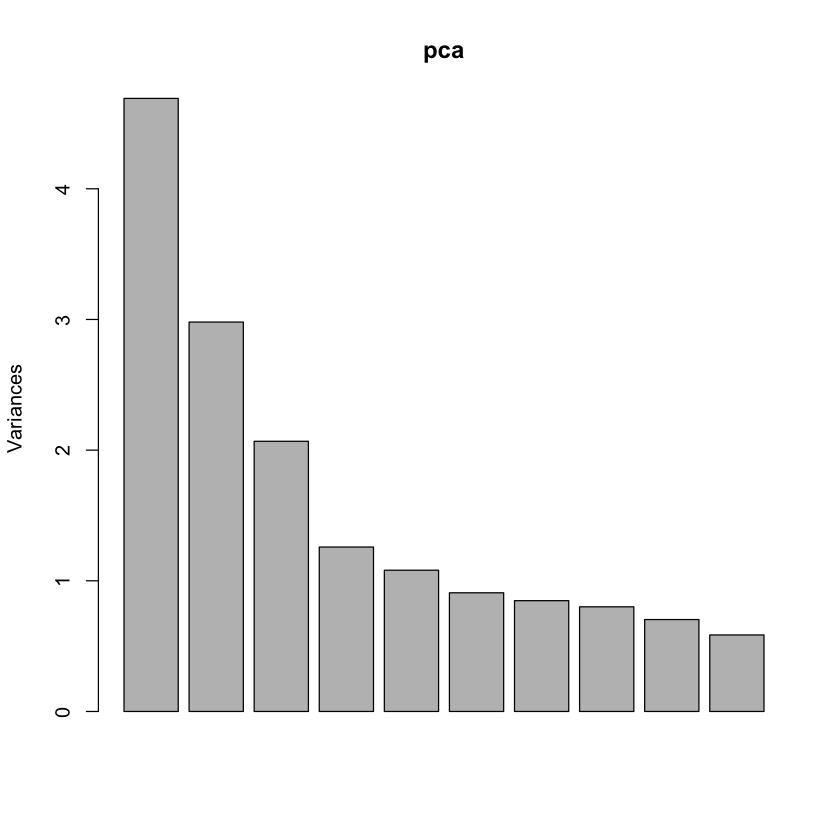

In [38]:
# Optional: Scree plot
plot(pca)

In [39]:
# Assuming 'pca_result' contains the PCA-transformed features and 'new_df' is the original dataset
df_new <- cbind(new_df, principal_components)

#### Correlation matrix

In [40]:
# convert factor to numeric
factor_columns <- sapply(df_new, is.factor)
df_new[factor_columns] <- lapply(df_new[factor_columns], as.numeric)

# correlation matrix
cormat <- round(cor(df_new), 2)

In [41]:
get_upper_tri <- function(cormat)
    
{   
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
}

In [42]:
upper_tri <- get_upper_tri(cormat)

In [43]:
# Melt the correlation matrix
library(reshape2)
cor_melt <- melt(upper_tri, na.rm = TRUE)

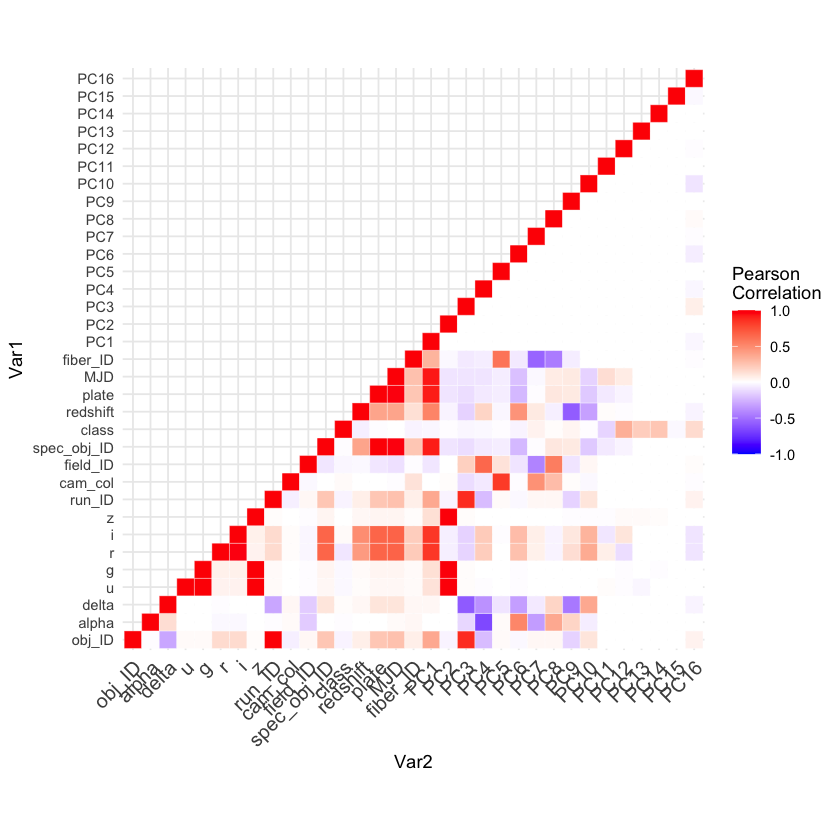

In [44]:
# Heatmap
library(ggplot2)

ggplot(data = cor_melt, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

#### Normalise the data

In [45]:
# Normalize numerical variables using Min-Max scaling

df_new[, sapply(df_new, is.numeric)] <- 
                apply(df_new[, sapply(df_new, is.numeric)], 
                2, function(x) (x - min(x)) / (max(x) - min(x)))

In [46]:
print("Min-Max Scaled Data:")
print(head(df_new))

[1] "Min-Max Scaled Data:"
     obj_ID     alpha     delta         u         g         r         i
1 0.4342034 0.3769048 0.5038025 0.9991126 0.9990702 0.5353444 0.4276646
2 0.5474962 0.4022858 0.4918121 0.9992022 0.9991256 0.6462028 0.5159863
3 0.4342035 0.3949598 0.5341388 0.9992505 0.9991089 0.5462180 0.4357293
4 0.5069848 0.9409469 0.1805998 0.9989389 0.9992198 0.5969456 0.4867170
5 0.9925028 0.9591182 0.3926793 0.9986698 0.9986021 0.3379985 0.2870206
6 0.9925028 0.9472084 0.3868397 0.9990736 0.9991761 0.5822786 0.4757610
          z    run_ID cam_col   field_ID spec_obj_ID class   redshift     plate
1 0.9989440 0.4342481     0.2 0.06952965   0.4515852   0.0 0.09183086 0.4515919
2 0.9992253 0.5474978     0.8 0.11042945   0.8288330   0.0 0.11238889 0.8288413
3 0.9989594 0.4342481     0.2 0.11145194   0.3509462   0.0 0.09316979 0.3509486
4 0.9989895 0.5070160     0.4 0.20756646   0.7233129   0.0 0.13420985 0.7233124
5 0.9986200 0.9925494     0.4 0.12883436   0.4767589   0.0 0.01795891

In [47]:
levels(df_new$class) <- c("GALAXY", "QSO", "STAR")


In [48]:
unique_values <- unique(df_new$class)
unique_values

[1] 0.0 0.5 1.0

In [49]:
dim(df_new)
str(df_new)

[1] 100000     33

'data.frame':	100000 obs. of  33 variables:
 $ obj_ID     : num  0.434 0.547 0.434 0.507 0.993 ...
 $ alpha      : num  0.377 0.402 0.395 0.941 0.959 ...
 $ delta      : num  0.504 0.492 0.534 0.181 0.393 ...
 $ u          : num  0.999 0.999 0.999 0.999 0.999 ...
 $ g          : num  0.999 0.999 0.999 0.999 0.999 ...
 $ r          : num  0.535 0.646 0.546 0.597 0.338 ...
 $ i          : num  0.428 0.516 0.436 0.487 0.287 ...
 $ z          : num  0.999 0.999 0.999 0.999 0.999 ...
 $ run_ID     : num  0.434 0.547 0.434 0.507 0.993 ...
 $ cam_col    : num  0.2 0.8 0.2 0.4 0.4 0.4 0.2 0.2 0.8 0.6 ...
 $ field_ID   : num  0.0695 0.1104 0.1115 0.2076 0.1288 ...
 $ spec_obj_ID: num  0.452 0.829 0.351 0.723 0.477 ...
 $ class      : num  0 0 0 0 0 0.5 0.5 0 0 1 ...
  ..- attr(*, "levels")= chr [1:3] "GALAXY" "QSO" "STAR"
 $ redshift   : num  0.0918 0.1124 0.0932 0.1342 0.018 ...
 $ plate      : num  0.452 0.829 0.351 0.723 0.477 ...
 $ MJD        : num  0.648 0.894 0.544 0.878 0.625 ...
 $ fib

In [65]:
write.csv(df_new, file = "star_r_preprocessed.csv", row.names = FALSE) 

#### Train Test Split

In [50]:
# Split the dataset into training and testing sets
set.seed(123)  
trainIndex <- createDataPartition(df_new[["class"]], p = 0.7, list = FALSE)
train_data <- df_new[trainIndex, , drop = FALSE] 
test_data <- df_new[-trainIndex, , drop = FALSE]

In [51]:
train_class_distribution <- table(train_data$class)
test_class_distribution <- table(test_data$class)

print("Train Class Distribution:")
print(train_class_distribution)
print("Test Class Distribution:")
print(test_class_distribution)

[1] "Train Class Distribution:"

    0   0.5     1 
41625 13260 15116 
[1] "Test Class Distribution:"

    0   0.5     1 
17820  5701  6478 


In [52]:
# Convert 'class' variable to factor
train_data$class <- factor(train_data$class)
test_data$class <- factor(test_data$class)

#### Random Forest

In [53]:
# Create a random forest model with classification
rf <- randomForest(class ~ ., 
                         data = train_data, 
                         ntree = 500, 
                         type = "classification")

In [54]:
# Print a summary of the model
print(rf)


Call:
 randomForest(formula = class ~ ., data = train_data, ntree = 500,      type = "classification") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 2.38%
Confusion matrix:
        0   0.5     1  class.error
0   40906   413   306 0.0172732733
0.5   935 12321     4 0.0708144796
1       8     0 15108 0.0005292405


In [55]:
# Make predictions on the test set
pred <- predict(rf, test_data)

In [56]:
# Evaluate the model
confusion_matrix <- table(pred, test_data$class)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(confusion_matrix)
print(paste("Accuracy:", accuracy))

     
pred      0   0.5     1
  0   17510   394     3
  0.5   190  5307     0
  1     120     0  6475
[1] "Accuracy: 0.976432547751592"


In [2]:
conf_matrix <- matrix(c(17510, 394, 3, 190, 5307, 0, 120, 0, 6475), nrow = 3, byrow = TRUE,
                      dimnames = list(c("0", "0.5", "1"), c("0", "0.5", "1")))

binary_pred <- ifelse(as.numeric(row.names(conf_matrix)) >= 0.5, 1, 0)

precision <- diag(conf_matrix) / rowSums(conf_matrix)
recall <- diag(conf_matrix) / colSums(conf_matrix)
f1_score <- 2 * precision * recall / (precision + recall)

cat("F1 Score class 0:", f1_score[1], "\n")
cat("F1 Score class 0.5:", f1_score[2], "\n")
cat("F1 Score class 1:", f1_score[3], "\n")

F1 Score for class 0: 0.980211 
F1 Score for class 0.5: 0.9478478 
F1 Score for class 1: 0.9905913 


In [3]:
f1_scores <- c(0.980211, 0.9478478, 0.9905913)

avg <- mean(f1_scores)

cat("Mean F1 Score:", avg, "\n")


Mean F1 Score: 0.9728834 


#### Train Test Split

In [57]:
set.seed(123)

In [58]:
# Set the ratio
split <- sample.split(df_new$class, SplitRatio = 0.7) 

# train set
train_data <- subset(df_new, split == TRUE)

# test set
test_data <- subset(df_new, split == FALSE)

In [59]:
# one-hot encoding
train_data_encoded <- model.matrix(~ . - 1, data = train_data[, -which(names(train_data) == "class")])
test_data_encoded <- model.matrix(~ . - 1, data = test_data[, -which(names(test_data) == "class")])

#### Gradient Boosting

In [60]:
xgb <- xgboost(
  data = as.matrix(train_data_encoded),
  label = train_data$class,
  nrounds = 100,
  objective = "multi:softmax",
  num_class = length(unique(train_data$class))) # Adjusted to the number of unique classes

[1]	train-mlogloss:0.777112 
[2]	train-mlogloss:0.593702 
[3]	train-mlogloss:0.475568 
[4]	train-mlogloss:0.395451 
[5]	train-mlogloss:0.339400 
[6]	train-mlogloss:0.299416 
[7]	train-mlogloss:0.270951 
[8]	train-mlogloss:0.250268 
[9]	train-mlogloss:0.235353 
[10]	train-mlogloss:0.224438 
[11]	train-mlogloss:0.216600 
[12]	train-mlogloss:0.210868 
[13]	train-mlogloss:0.206682 
[14]	train-mlogloss:0.203680 
[15]	train-mlogloss:0.201427 
[16]	train-mlogloss:0.199853 
[17]	train-mlogloss:0.198685 
[18]	train-mlogloss:0.197957 
[19]	train-mlogloss:0.197307 
[20]	train-mlogloss:0.196837 
[21]	train-mlogloss:0.196526 
[22]	train-mlogloss:0.196311 
[23]	train-mlogloss:0.196137 
[24]	train-mlogloss:0.196080 
[25]	train-mlogloss:0.195860 
[26]	train-mlogloss:0.195842 
[27]	train-mlogloss:0.195642 
[28]	train-mlogloss:0.195612 
[29]	train-mlogloss:0.195724 
[30]	train-mlogloss:0.195744 
[31]	train-mlogloss:0.195766 
[32]	train-mlogloss:0.195646 
[33]	train-mlogloss:0.195642 
[34]	train-mlogloss

In [61]:
print(xgb)

##### xgb.Booster
raw: 690.1 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, objective = "multi:softmax", num_class = ..2)
params (as set within xgb.train):
  objective = "multi:softmax", num_class = "3", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 32 
niter: 100
nfeatures : 32 
evaluation_log:
     iter train_mlogloss
    <num>          <num>
        1      0.7771118
        2      0.5937016
---                     
       99      0.1977992
      100      0.1977986


In [62]:
pred_test <- predict(xgb, test_data_encoded)

In [63]:
pred_test <- as.factor(pred_test)

In [64]:
accuracy <- mean(pred_test == test_data$class)
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.809160305343511"
